In [1]:
from models.resnet import ResNet
from trainer import Trainer
import torch
from torch.optim import SGD
from dataset import BreathDataset
from losses.focal_loss import FocalLoss
from collections import Counter

model = ResNet()

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

trainer = Trainer(
    model=model,
    trainset=BreathDataset(train=True, transform=True),
    testset=BreathDataset(train=False, transform=True),
    num_epochs=200,
    batch_size=64,
    lr=1e-3,
    device=device
)

trainctr = Counter([trainer.trainset[i]['sound'] for i in range(len(trainer.trainset))])
cls_list = torch.Tensor([trainctr[j] for j in range(4)])

trainer.train(criterion='focal', cls_list=cls_list, optimizer=SGD(trainer.model.parameters(), lr=1e-3, momentum=.9))

AssertionError: Caught AssertionError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/env/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/env/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/env/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/dataset.py", line 68, in __getitem__
    mean, std = get_mean_and_std(self)
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/dataset.py", line 17, in get_mean_and_std
    for sample in dataloader:
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/env/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 439, in __iter__
    return self._get_iterator()
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/env/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 387, in _get_iterator
    return _MultiProcessingDataLoaderIter(self)
  File "/Users/aryanmittal/Desktop/Dev/audio-disease-detection/env/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1040, in __init__
    w.start()
  File "/opt/homebrew/Cellar/python@3.10/3.10.13/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 118, in start
    assert not _current_process._config.get('daemon'), \
AssertionError: daemonic processes are not allowed to have children


In [2]:
# save/load model
# torch.save(trainer.model.state_dict(), 'checkpoints/resnet5')
# model = ResNet()
model.load_state_dict(torch.load('checkpoints/resnet6'))
# model.eval()

<All keys matched successfully>

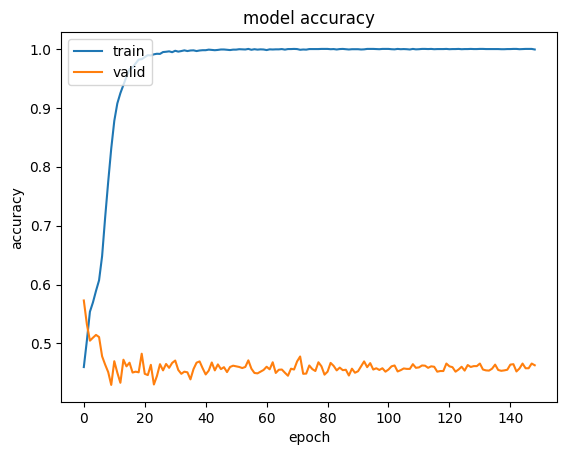

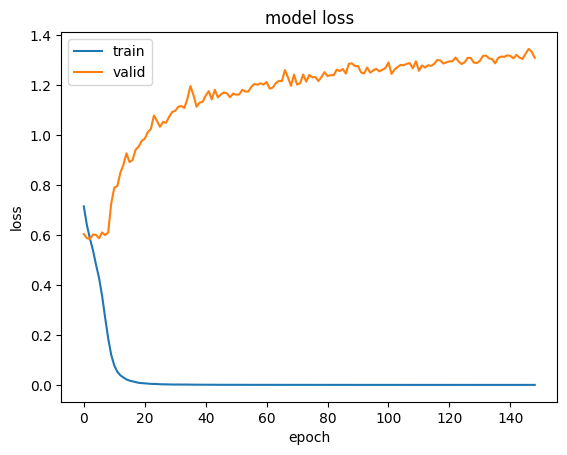

In [4]:
import matplotlib.pyplot as plt

train_loss, valid_loss, train_accuracy, valid_accuracy = trainer.history()

plt.plot(train_accuracy)
plt.plot(valid_accuracy)
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "valid"], loc="upper left")
plt.show()

plt.plot(train_loss)
plt.plot(valid_loss)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "valid"], loc="upper left")
plt.show()

In [3]:
trainer.eval()

{'sensitivity': 0.308411214953271,
 'specificity': 0.5839138695376821,
 'icbhi': 0.4461625422454766,
 'raw': (363, 922, 1177, 1579),
 'accuracy': 0.46625544267053703}